# Principal Component Analysis

In [72]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## PCA for all variables of interest over time

In [96]:
# read in the data 
data = pd.read_csv('Datasets/combined_data.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN,1949-03
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN,1949-03
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN,1949-03
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN,1949-03
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN,1949-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8,2021-05
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4,2021-05
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9,2021-05
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6,2021-05


In [97]:
# data_plot = data[['ChlorA', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Wave_Ht']]

# plt.figure(figsize=(10, 8))

# for col in data_plot.columns:
#     plt.plot(data_plot.index, data_plot[col], label=col)

# #plt.title("Variables over time")
# plt.xlabel("Time")
# plt.ylabel("Values")
# plt.legend()
# plt.grid(True)
# plt.show()

In [98]:
# drop some of the columns
data = data[['Julian_Date', 'ChlorA', 'T_degC', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Lat_Dec', 'Lon_Dec', 'Wave_Ht', 'Depthm']]
data

,Julian_Date,ChlorA,T_degC,O2ml_L,PO4uM,SiO3uM,NO3uM,Lat_Dec,Lon_Dec,Wave_Ht,Depthm
0,17958.0,NaN,8.414828,NaN,NaN,NaN,NaN,38.833333,-124.083333,NaN,246.689655
1,17958.0,NaN,6.612188,NaN,NaN,NaN,NaN,38.583333,-125.800000,NaN,385.750000
2,17959.0,NaN,7.291935,NaN,NaN,NaN,NaN,38.475000,-126.666666,NaN,339.935484
3,17959.0,NaN,7.437742,NaN,NaN,NaN,NaN,38.333333,-127.516666,NaN,309.709677
4,17959.0,NaN,8.095385,NaN,NaN,NaN,NaN,38.233333,-128.366666,NaN,208.038462
...,...,...,...,...,...,...,...,...,...,...,...
35639,44321.0,0.441000,10.189478,3.393522,1.753478,27.994783,21.642174,31.846300,-119.565900,2.0,171.956522
35640,44322.0,0.296533,10.864045,3.831318,1.485909,23.364091,17.431364,31.515130,-120.240520,NaN,170.590909
35641,44322.0,0.214667,10.590261,3.374952,1.610000,27.298182,19.575000,31.176820,-120.920900,NaN,164.739130
35642,44322.0,0.235235,10.446458,3.724625,1.532917,26.943333,18.801250,30.846380,-121.589030,3.0,162.541667


In [99]:
# Aggregate data to ensure uniqueness
data = data.dropna()
data = data.groupby('Julian_Date').mean()
data

,ChlorA,T_degC,O2ml_L,PO4uM,SiO3uM,NO3uM,Lat_Dec,Lon_Dec,Wave_Ht,Depthm
Julian_Date,,,,,,,,,,
26737.0,9.499583,16.959286,5.611714,1.273000,18.822857,0.285000,31.314999,-114.425000,6.000000,14.187500
28468.0,0.795373,12.533327,3.619496,1.409068,20.759594,15.922569,28.833889,-116.849444,2.666667,170.413306
28469.0,0.652000,12.606803,3.673024,1.185872,20.159319,14.606153,30.097499,-116.091667,3.000000,156.254608
28470.0,0.341000,12.051613,3.738387,1.126452,23.977419,14.341935,29.533333,-118.033333,2.000000,172.064516
28471.0,0.115750,11.426935,3.585323,1.210161,24.362903,16.370968,32.012499,-117.628333,3.500000,171.870968
...,...,...,...,...,...,...,...,...,...,...
44325.0,0.802039,11.851773,3.803602,1.536471,22.479194,17.903716,33.656523,-118.582750,1.500000,108.288952
44326.0,0.377198,10.000938,3.151137,1.898645,30.983412,22.889900,33.046817,-120.235173,6.333333,168.986667
44327.0,0.268355,10.633449,4.104231,1.395966,23.409716,16.341799,32.980480,-123.565595,6.000000,160.294384


In [100]:
### # Apply PCA on the data considering m=12 (dimensions) and n=100 observations
pca = PCA()
PCs = pca.fit_transform(data)  

In [101]:
PCs.shape

(2330, 10)

[9.88974980e-01 8.20395760e-03 1.27209975e-03 6.58794866e-04
 3.99470149e-04 2.84084901e-04 1.29593210e-04 6.97232552e-05
 6.51598980e-06 7.79971701e-07]
[[-4.47994437e-03 -1.13365882e-02 -4.97995291e-03  2.33960507e-03
   8.28775169e-02  3.81049239e-02 -4.73116311e-03 -8.53869752e-03
   5.86093232e-03  9.95676065e-01]
 [ 8.85808033e-03 -1.55328404e-01 -7.44923147e-02  4.24868321e-02
   7.56786626e-01  6.17067467e-01  7.87522465e-02  3.02726608e-02
   6.48790363e-03 -8.82138637e-02]
 [-6.76083090e-02 -8.86656819e-02  1.77885165e-02 -2.36089914e-03
  -3.79213640e-02  4.35019541e-02 -1.73946136e-02 -4.92550824e-01
   8.60769041e-01 -9.10104910e-03]
 [-5.21084050e-02  1.32647294e-01 -4.77121026e-02  1.18240501e-03
   4.19692472e-02 -1.50832775e-02 -4.00704009e-01  7.81293492e-01
   4.52149705e-01  2.52902255e-04]
 [ 2.92897807e-01 -6.87906083e-02  8.38389187e-02 -9.69689095e-03
   2.05013181e-01 -3.75979624e-01  7.67814731e-01  2.84302359e-01
   2.20426430e-01  3.08989209e-03]
 [-1.713669

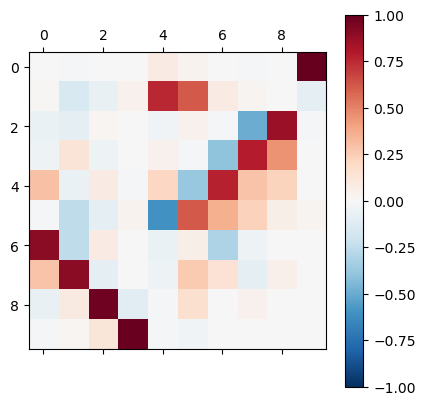

In [102]:
FracVar = pca.explained_variance_ratio_  # calculate fraction of variance explained by each mode
print(FracVar)
eigvecs = pca.components_
print(eigvecs)
print(eigvecs.shape)
plt.colorbar(plt.matshow(eigvecs, cmap="RdBu_r", vmin=-1, vmax=1))

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_3362/2134956138.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


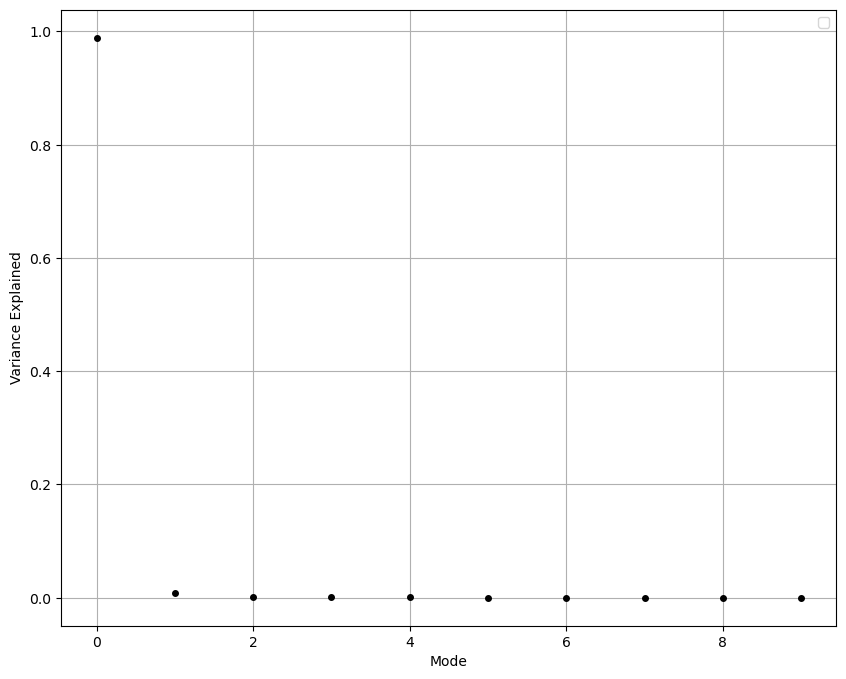

In [103]:
plt.figure(figsize=(10, 8))

plt.plot(fraction_variance, "ko", ms=4)

#plt.title("Variables over time")
plt.xlabel("Mode")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

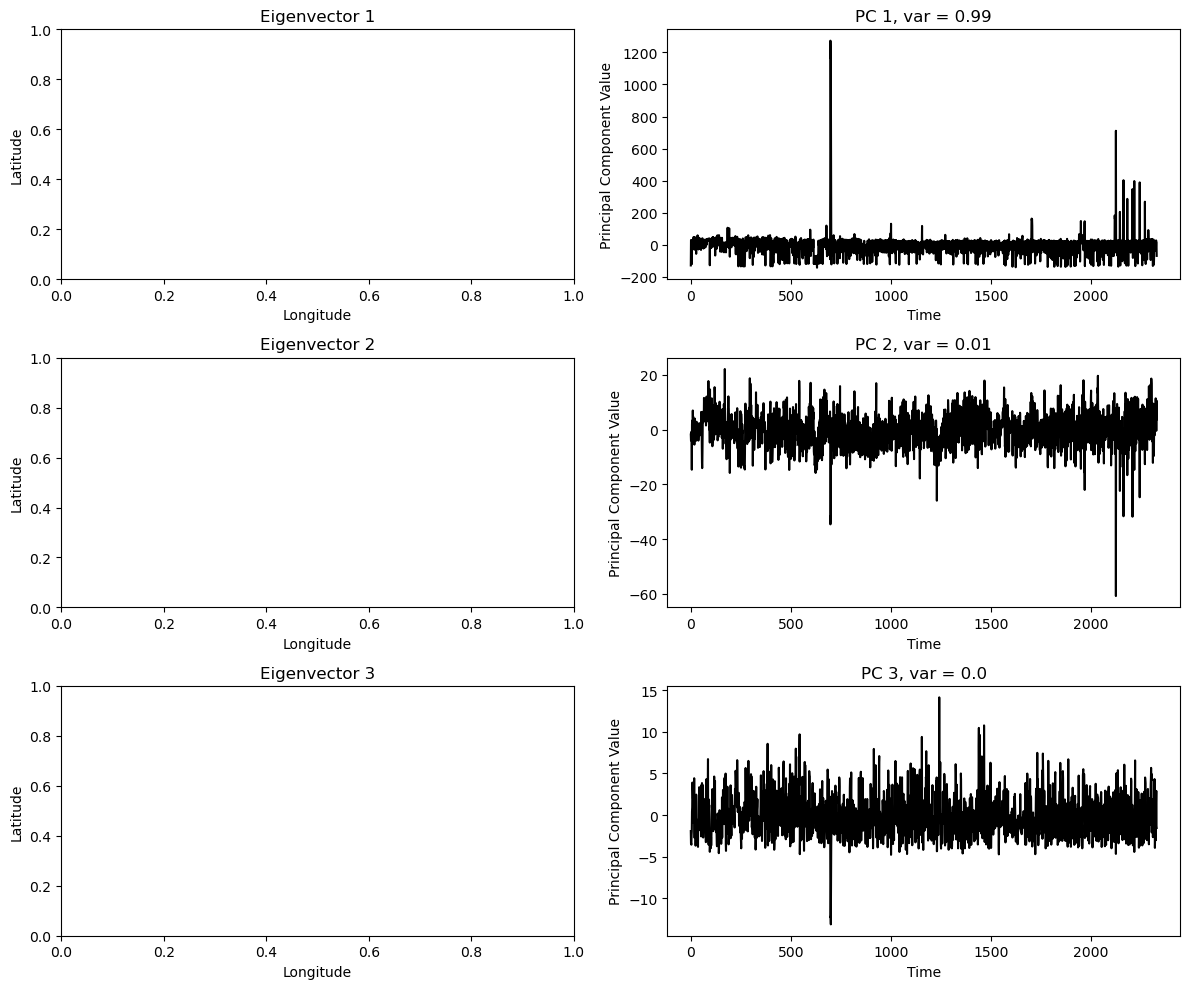

In [109]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed

for i in range(3):
    plt.subplot(3, 2, i * 2 + 1)
    #plt.scatter(c=eigvecs[i], s=200, cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title(f"Eigenvector {i + 1}")
    #plt.colorbar(label='Eigenvector Value')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.subplot(3, 2, i * 2 + 2)
    plt.plot(PCs[:, i], c="k")
    plt.title(f"PC {i + 1}, var = {round(fraction_variance[i], 2)}")
    plt.xlabel("Time")
    plt.ylabel("Principal Component Value")

plt.tight_layout()
plt.show()

## Temperature per station over time

In [264]:
# read in the data 
data = pd.read_csv('Datasets/combined_data.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN,1949-03
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN,1949-03
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN,1949-03
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN,1949-03
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN,1949-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8,2021-05
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4,2021-05
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9,2021-05
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6,2021-05


In [265]:
# filter out other data
data = data[['Julian_Date', 'Sta_ID', 'T_degC', 'Lat_Dec', 'Lon_Dec']]
data = data.dropna()
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17958.0,054.0 056.0,8.414828,38.833333,-124.083333
1,17958.0,052.0 075.0,6.612188,38.583333,-125.800000
2,17959.0,051.0 085.0,7.291935,38.475000,-126.666666
3,17959.0,050.0 095.0,7.437742,38.333333,-127.516666
4,17959.0,050.0 104.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,10.189478,31.846300,-119.565900
35640,44322.0,093.3 070.0,10.864045,31.515130,-120.240520
35641,44322.0,093.3 080.0,10.590261,31.176820,-120.920900
35642,44322.0,093.3 090.0,10.446458,30.846380,-121.589030


In [266]:
# filter Sta_ID
# data['Sta_ID'] = data['Sta_ID'].str.split().str[1]
data = data.dropna()
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17958.0,054.0 056.0,8.414828,38.833333,-124.083333
1,17958.0,052.0 075.0,6.612188,38.583333,-125.800000
2,17959.0,051.0 085.0,7.291935,38.475000,-126.666666
3,17959.0,050.0 095.0,7.437742,38.333333,-127.516666
4,17959.0,050.0 104.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,10.189478,31.846300,-119.565900
35640,44322.0,093.3 070.0,10.864045,31.515130,-120.240520
35641,44322.0,093.3 080.0,10.590261,31.176820,-120.920900
35642,44322.0,093.3 090.0,10.446458,30.846380,-121.589030


In [267]:
# Function to round the second part of Sta_ID to the nearest 10
def round_sta_id(value):
    parts = value.split()  # Split the Sta_ID into components
    rounded_parts = [
        f"{float(part):.1f}" if i == 0 else f"{10 * round(float(part) / 10):.1f}"
        for i, part in enumerate(parts)
    ]
    return " ".join(rounded_parts)

# Apply the rounding function to the Sta_ID column
data['Sta_ID'] = data['Sta_ID'].apply(round_sta_id)

# Display the updated DataFrame
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17958.0,54.0 60.0,8.414828,38.833333,-124.083333
1,17958.0,52.0 80.0,6.612188,38.583333,-125.800000
2,17959.0,51.0 80.0,7.291935,38.475000,-126.666666
3,17959.0,50.0 100.0,7.437742,38.333333,-127.516666
4,17959.0,50.0 100.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35639,44321.0,93.3 60.0,10.189478,31.846300,-119.565900
35640,44322.0,93.3 70.0,10.864045,31.515130,-120.240520
35641,44322.0,93.3 80.0,10.590261,31.176820,-120.920900
35642,44322.0,93.3 90.0,10.446458,30.846380,-121.589030


In [217]:
unique_stations = data['Sta_ID'].nunique()
unique_stations

1330

In [218]:
# # round to nearest station
# data['Sta_ID'] = data['Sta_ID'].astype(float)
# data['Sta_ID'] = data['Sta_ID'].apply(lambda x: round(x / 10) * 10)
# data

In [268]:
# Define the grouping logic
grouped_dates = []
current_group = []

for idx, date in enumerate(data['Julian_Date']):
    if not current_group or (date - current_group[0]) <= 30:
        current_group.append(date)
    else:
        grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))
        current_group = [date]

# Add the last group
if current_group:
    grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))

# Replace the Julian_Date column with the grouped dates
data['Julian_Date'] = grouped_dates

# Drop duplicates if needed to keep unique Julian_Date aggregates
data = data.drop_duplicates().reset_index(drop=True)

# Display the result
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17963.0,54.0 60.0,8.414828,38.833333,-124.083333
1,17963.0,52.0 80.0,6.612188,38.583333,-125.800000
2,17963.0,51.0 80.0,7.291935,38.475000,-126.666666
3,17963.0,50.0 100.0,7.437742,38.333333,-127.516666
4,17963.0,50.0 100.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35350,44325.0,93.3 60.0,10.189478,31.846300,-119.565900
35351,44325.0,93.3 70.0,10.864045,31.515130,-120.240520
35352,44325.0,93.3 80.0,10.590261,31.176820,-120.920900
35353,44325.0,93.3 90.0,10.446458,30.846380,-121.589030


In [269]:
data = data.groupby(['Julian_Date', 'Sta_ID'], as_index=False)[['T_degC', 'Lat_Dec', 'Lon_Dec']].mean()
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17963.0,101.0 30.0,9.860370,31.366666,-116.925000
1,17963.0,101.0 40.0,9.117000,31.008333,-117.500000
2,17963.0,102.0 100.0,9.992000,28.850000,-121.316666
3,17963.0,102.0 50.0,9.211562,30.675000,-118.508333
4,17963.0,102.0 60.0,8.292813,30.250000,-118.833333
...,...,...,...,...,...
22808,44325.0,93.3 50.0,10.021190,32.179380,-118.894120
22809,44325.0,93.3 60.0,10.199080,31.929840,-119.399015
22810,44325.0,93.3 70.0,10.864045,31.515130,-120.240520
22811,44325.0,93.3 80.0,10.590261,31.176820,-120.920900


In [270]:
unique_stations = data['Sta_ID'].nunique()
unique_stations

1330

In [271]:
# # save Lat and Lon
# stations = {}
# for sta_id, group in data.groupby('Sta_ID'):
#     stations[sta_id] = group[['Lat_Dec', 'Lon_Dec']]

# stations

In [272]:
pivoted_df = data.pivot(index='Julian_Date', columns='Sta_ID', values='T_degC')
pivoted_df

Sta_ID,1.0 170.0,1.0 260.0,10.0 10.0,10.0 100.0,10.0 20.0,10.0 30.0,10.0 40.0,10.0 50.0,10.0 60.0,10.0 70.0,...,99.0 40.0,99.0 50.0,99.0 60.0,99.0 70.0,99.0 90.0,99.5 40.0,99.5 60.0,99.7 40.0,99.7 50.0,99.7 60.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
17963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18025.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
non_nan_counts = pivoted_df.count()

max_non_nan_column = non_nan_counts.idxmax()
max_non_nan_count = non_nan_counts.max()

print(f"Column with most non-NaN values: {max_non_nan_column}")
print(f"Number of non-NaN values: {max_non_nan_count}")


Column with most non-NaN values: 90.0 40.0
Number of non-NaN values: 284


In [274]:
column = pivoted_df[max_non_nan_column]
column 

Julian_Date
17963.0          NaN
17994.0          NaN
18025.5          NaN
18052.0          NaN
18087.0          NaN
             ...    
40759.0    10.987350
40840.0    11.165115
40943.0    10.633113
40999.0    10.090447
44325.0    10.728425
Name: 90.0 40.0, Length: 355, dtype: float64

In [275]:
column = column.dropna()
column

Julian_Date
18304.0     8.270000
18361.0     8.303933
18394.0     7.656058
18429.0     8.309081
18459.0     8.646351
             ...    
40759.0    10.987350
40840.0    11.165115
40943.0    10.633113
40999.0    10.090447
44325.0    10.728425
Name: 90.0 40.0, Length: 284, dtype: float64

In [276]:
# Calculate the number of NaN values in each column (station)
nan_counts = pivoted_df.isna().sum()

# Sort the stations by the number of NaN values in descending order
stations_with_most_nans = nan_counts.sort_values(ascending=False)

# Drop the stations with the most NaN values
pivoted_df_cleaned = pivoted_df.drop(columns=stations_with_most_nans.index[:1295])  # Adjust the number (5) as needed

# Display the cleaned dataframe
print(pivoted_df_cleaned)


Sta_ID       76.7 50.0  76.7 60.0  80.0 50.0  80.0 60.0  80.0 70.0  80.0 80.0  \
Julian_Date                                                                     
17963.0            NaN        NaN        NaN        NaN        NaN        NaN   
17994.0            NaN        NaN        NaN        NaN        NaN        NaN   
18025.5            NaN        NaN        NaN        NaN        NaN        NaN   
18052.0            NaN        NaN        NaN        NaN        NaN        NaN   
18087.0            NaN        NaN        NaN        NaN        NaN        NaN   
...                ...        ...        ...        ...        ...        ...   
40759.0      11.464038   9.993954  13.668901   9.987192  11.091429  10.539032   
40840.0      11.959439  10.002132  14.386286  10.990417  10.868571  10.872759   
40943.0      11.408550   9.589174  12.965855   9.513615   9.983871  10.214375   
40999.0       9.856472   9.203915  10.576875   9.068853        NaN   9.950968   
44325.0            NaN      

In [277]:
pivoted_df_cleaned = pivoted_df_cleaned.dropna()
pivoted_df_cleaned

Sta_ID,76.7 50.0,76.7 60.0,80.0 50.0,80.0 60.0,80.0 70.0,80.0 80.0,80.0 90.0,81.8 50.0,83.3 40.0,83.3 50.0,...,90.0 70.0,90.0 80.0,90.0 90.0,93.3 30.0,93.3 40.0,93.3 50.0,93.3 60.0,93.3 70.0,93.3 80.0,93.3 90.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
24308.0,9.812857,9.462015,9.637368,9.083262,10.217742,10.823438,11.184375,9.324667,11.259000,11.084167,...,10.718276,11.403226,10.991563,10.410822,10.158750,10.453030,10.075667,9.842414,10.484000,11.062727
25222.0,11.639091,9.888921,11.027367,9.955540,10.548571,10.274955,10.344286,10.856187,12.601944,12.344286,...,10.246429,9.879643,10.703571,10.935000,11.355357,11.280714,10.702357,10.517857,10.807143,11.600000
25405.0,11.488000,9.725714,11.348636,9.829286,11.185714,11.123773,11.240814,10.858323,12.728889,12.003333,...,11.091429,11.699286,11.667143,11.659341,10.135714,9.832143,11.290714,11.588571,11.424286,12.587143
25503.0,11.621333,9.821098,11.342841,9.822630,9.638246,10.258917,11.006319,11.105140,12.663115,13.960000,...,10.194058,11.780267,11.970901,11.714463,11.046235,11.166667,11.012667,11.177333,10.979333,10.668667
28511.5,11.932500,10.729323,12.546190,10.308000,10.096333,9.873871,9.531613,11.086452,13.615556,13.357500,...,10.278065,10.243125,11.008710,11.415720,11.338065,11.415667,10.480000,10.712500,10.848621,11.083871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40202.0,12.885194,10.349461,14.299583,10.550668,10.433548,9.228621,6.835385,10.416111,14.164306,13.386875,...,10.294839,10.587419,10.705700,12.660172,11.137427,10.636129,10.995847,10.659000,10.351333,11.511724
40567.0,11.464182,9.703169,12.576238,9.360321,9.432333,9.217241,6.499423,9.555941,12.838730,11.416842,...,10.355161,10.838667,8.694182,10.859075,10.142797,9.534828,9.895941,10.256552,10.739375,11.379167
40759.0,11.464038,9.993954,13.668901,9.987192,11.091429,10.539032,10.854828,9.346875,14.617222,11.500833,...,10.922500,11.157857,7.436939,12.442523,10.572563,10.120714,10.691875,10.477500,12.254062,11.577879


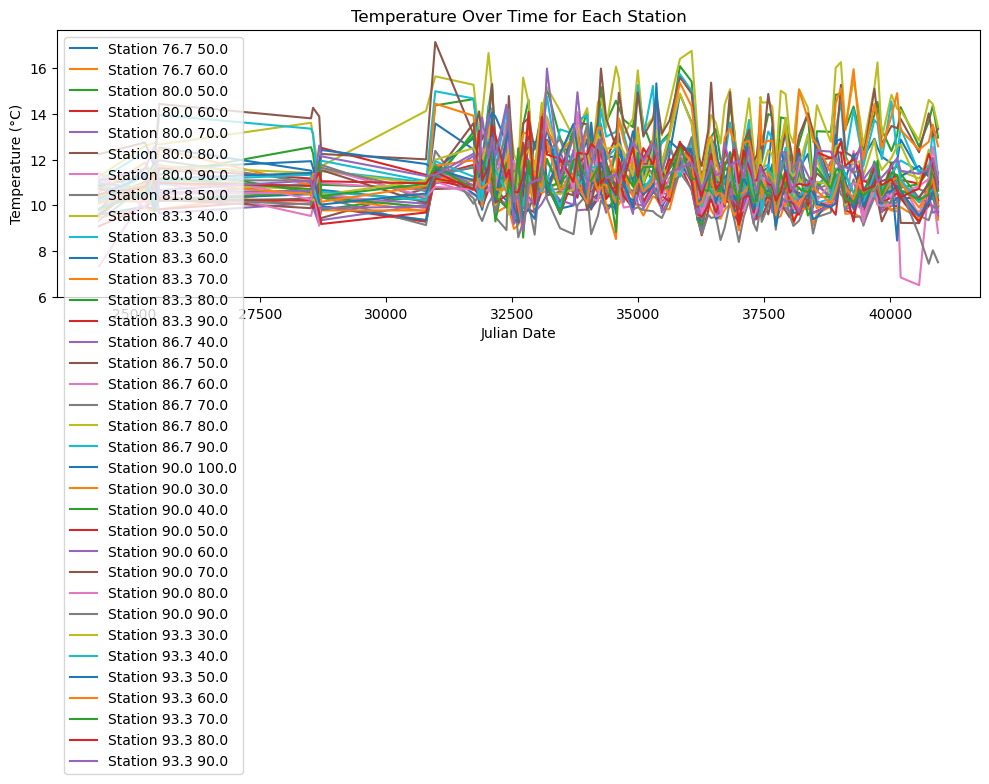

In [278]:
# Assuming the data is in a DataFrame called df
plt.figure(figsize=(10, 6))

# Plot temperature for each station
for station in pivoted_df_cleaned.columns:
    plt.plot(pivoted_df_cleaned.index, pivoted_df_cleaned[station], label=f'Station {station}')

# Adding labels and title
plt.xlabel('Julian Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time for Each Station')

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [279]:
### # Apply PCA on the data considering m=12 (dimensions) and n=100 observations
pca = PCA()
PCs = pca.fit_transform(pivoted_df_cleaned)  

[0.41729549 0.10642602 0.05686856 0.04480734 0.04054373 0.03275831
 0.03083404 0.02826456 0.02722397 0.02221169 0.02145808 0.01969906
 0.01624154 0.01461218 0.01328413 0.01139594 0.01100852 0.00978082
 0.00963239 0.00821622 0.00715925 0.00697748 0.0061117  0.00573104
 0.00489522 0.00439965 0.00412521 0.00375513 0.00306655 0.00257531
 0.00235992 0.00221158 0.00167114 0.00145468 0.00094355]
(35, 35)


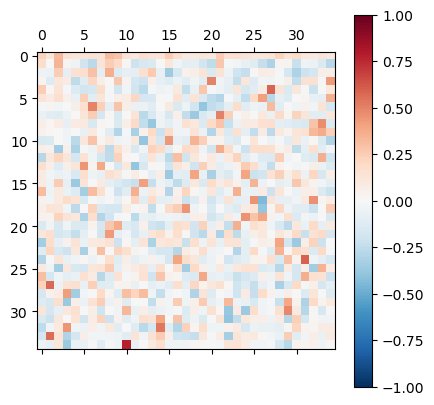

In [280]:
FracVar = pca.explained_variance_ratio_  # calculate fraction of variance explained by each mode
print(FracVar)
eigvecs = pca.components_
#print(eigvecs)
print(eigvecs.shape)
plt.colorbar(plt.matshow(eigvecs, cmap="RdBu_r", vmin=-1, vmax=1))

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_3362/3208488164.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


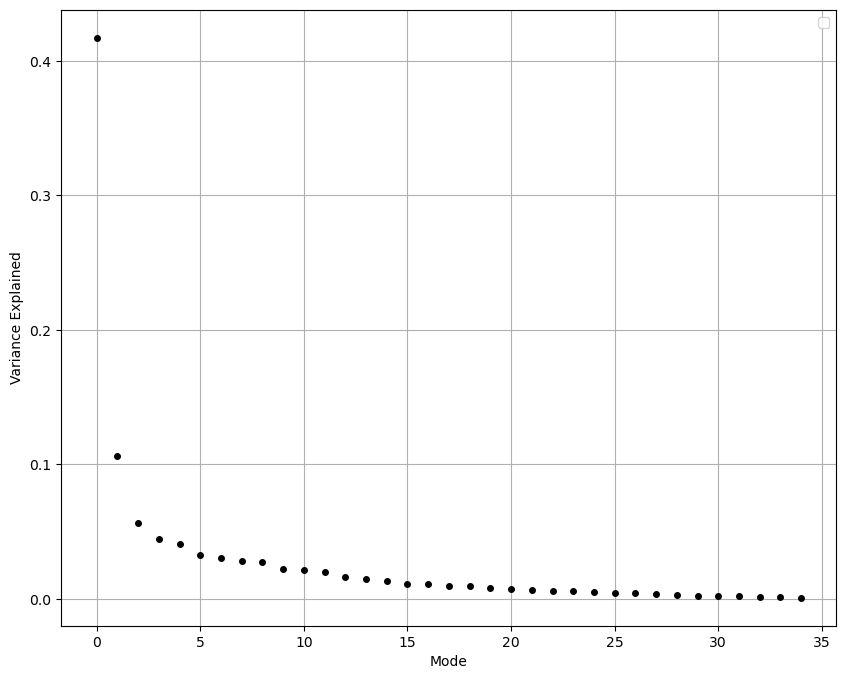

In [281]:
plt.figure(figsize=(10, 8))

plt.plot(FracVar, "ko", ms=4)

#plt.title("Variables over time")
plt.xlabel("Mode")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

In [282]:
# get the latitude and Longitude of these stations
stations_of_interest = pivoted_df_cleaned.columns

# Filter the DataFrame to get only the rows for the stations of interest
data = data.groupby(['Sta_ID'], as_index=False)[['Lat_Dec', 'Lon_Dec']].mean()
stations_lat_lon = data[data['Sta_ID'].isin(stations_of_interest)]

# Display the result
#print(stations_lat_lon[['Sta_ID', 'Lat_Dec', 'Lon_Dec']])
Lat = stations_lat_lon['Lat_Dec']
Lon = stations_lat_lon['Lon_Dec']
Lat

983     35.045534
985     34.801850
1020    34.437091
1021    34.225064
1022    33.813717
1023    33.481308
1024    33.151531
1038    34.266414
1056    34.184990
1058    33.879097
1059    33.643608
1060    33.242497
1061    32.912202
1062    32.574897
1107    33.667206
1108    33.327257
1109    33.049432
1110    32.654192
1111    32.320880
1112    31.989159
1153    31.086577
1169    33.432584
1170    33.082169
1171    32.666609
1172    32.429907
1173    32.077241
1174    31.745856
1175    31.412187
1226    32.882707
1227    32.510689
1228    32.175019
1229    31.883359
1230    31.505333
1231    31.170179
1232    30.840677
Name: Lat_Dec, dtype: float64

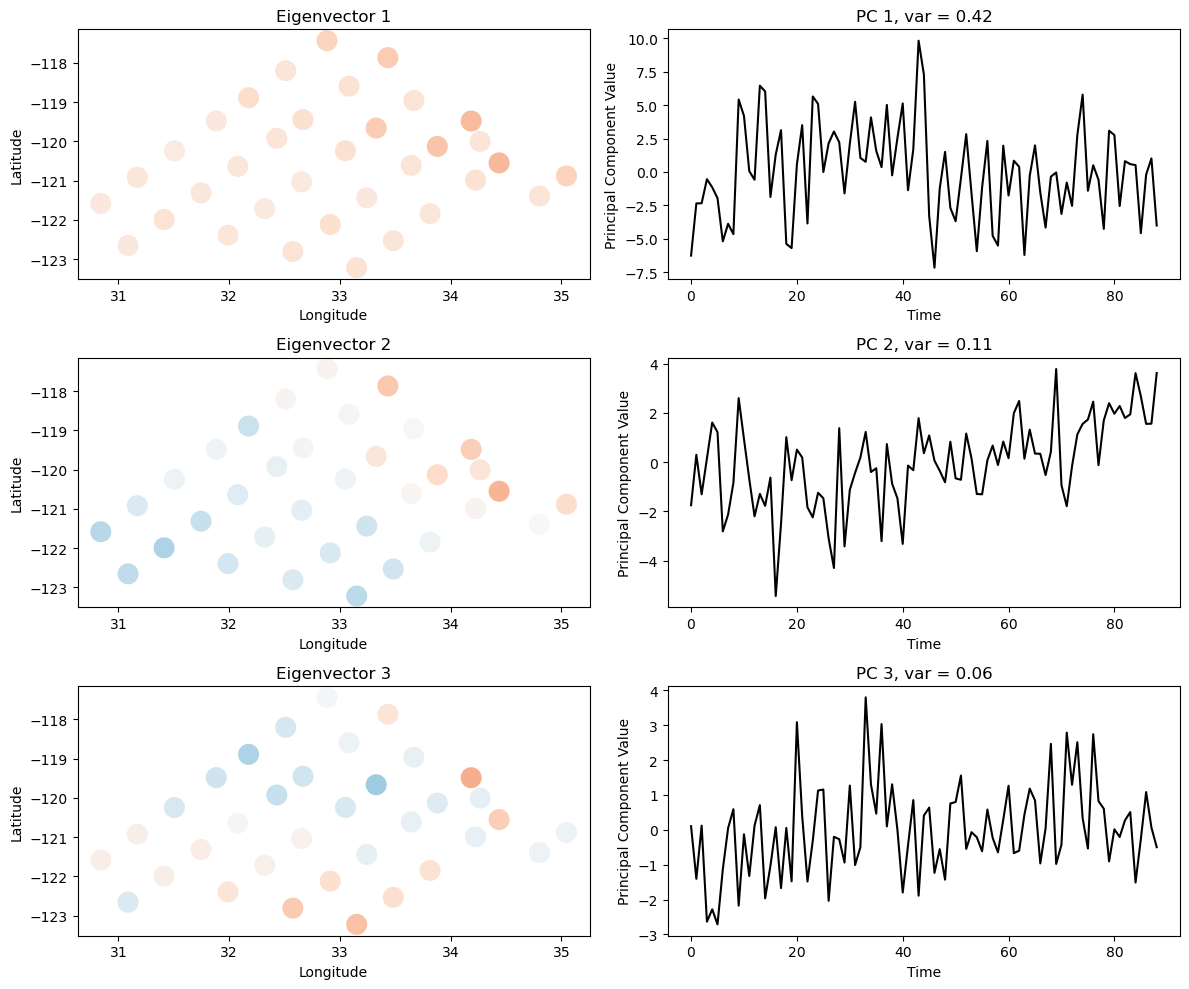

In [283]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed

for i in range(3):
    plt.subplot(3, 2, i * 2 + 1)
    plt.scatter(Lat, Lon, c=eigvecs[i], s=200, cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title(f"Eigenvector {i + 1}")
    #plt.colorbar(label='Eigenvector Value')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.subplot(3, 2, i * 2 + 2)
    plt.plot(PCs[:, i], c="k")
    plt.title(f"PC {i + 1}, var = {round(FracVar[i], 2)}")
    plt.xlabel("Time")
    plt.ylabel("Principal Component Value")

plt.tight_layout()
plt.show()

## Chlorophyll A

In [284]:
# read in the data 
data = pd.read_csv('Datasets/combined_data.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN,1949-03
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN,1949-03
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN,1949-03
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN,1949-03
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN,1949-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8,2021-05
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4,2021-05
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9,2021-05
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6,2021-05


In [286]:
# filter out other data
data = data[['Julian_Date', 'Sta_ID', 'ChlorA', 'Lat_Dec', 'Lon_Dec']]
data = data.dropna()
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
18831,26731.0,133.0 035.0,0.650000,25.850000,-113.500000
18832,26733.0,142.7 008.0,2.483333,25.026666,-110.750000
18833,26733.0,142.0 008.0,0.240000,25.093333,-110.783333
18834,26734.0,120.0 010.0,2.425000,28.856666,-113.258333
18835,26735.0,120.0 009.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,0.441000,31.846300,-119.565900
35640,44322.0,093.3 070.0,0.296533,31.515130,-120.240520
35641,44322.0,093.3 080.0,0.214667,31.176820,-120.920900
35642,44322.0,093.3 090.0,0.235235,30.846380,-121.589030


In [287]:
data = data.dropna()
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
18831,26731.0,133.0 035.0,0.650000,25.850000,-113.500000
18832,26733.0,142.7 008.0,2.483333,25.026666,-110.750000
18833,26733.0,142.0 008.0,0.240000,25.093333,-110.783333
18834,26734.0,120.0 010.0,2.425000,28.856666,-113.258333
18835,26735.0,120.0 009.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,0.441000,31.846300,-119.565900
35640,44322.0,093.3 070.0,0.296533,31.515130,-120.240520
35641,44322.0,093.3 080.0,0.214667,31.176820,-120.920900
35642,44322.0,093.3 090.0,0.235235,30.846380,-121.589030


In [288]:
# Apply the rounding function to the Sta_ID column
data['Sta_ID'] = data['Sta_ID'].apply(round_sta_id)

# Display the updated DataFrame
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
18831,26731.0,133.0 40.0,0.650000,25.850000,-113.500000
18832,26733.0,142.7 10.0,2.483333,25.026666,-110.750000
18833,26733.0,142.0 10.0,0.240000,25.093333,-110.783333
18834,26734.0,120.0 10.0,2.425000,28.856666,-113.258333
18835,26735.0,120.0 10.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
35639,44321.0,93.3 60.0,0.441000,31.846300,-119.565900
35640,44322.0,93.3 70.0,0.296533,31.515130,-120.240520
35641,44322.0,93.3 80.0,0.214667,31.176820,-120.920900
35642,44322.0,93.3 90.0,0.235235,30.846380,-121.589030


In [289]:
# Define the grouping logic
grouped_dates = []
current_group = []

for idx, date in enumerate(data['Julian_Date']):
    if not current_group or (date - current_group[0]) <= 30:
        current_group.append(date)
    else:
        grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))
        current_group = [date]

# Add the last group
if current_group:
    grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))

# Replace the Julian_Date column with the grouped dates
data['Julian_Date'] = grouped_dates

# Drop duplicates if needed to keep unique Julian_Date aggregates
data = data.drop_duplicates().reset_index(drop=True)

# Display the result
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
0,26740.0,133.0 40.0,0.650000,25.850000,-113.500000
1,26740.0,142.7 10.0,2.483333,25.026666,-110.750000
2,26740.0,142.0 10.0,0.240000,25.093333,-110.783333
3,26740.0,120.0 10.0,2.425000,28.856666,-113.258333
4,26740.0,120.0 10.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
13927,44325.0,93.3 60.0,0.441000,31.846300,-119.565900
13928,44325.0,93.3 70.0,0.296533,31.515130,-120.240520
13929,44325.0,93.3 80.0,0.214667,31.176820,-120.920900
13930,44325.0,93.3 90.0,0.235235,30.846380,-121.589030


In [290]:
data = data.groupby(['Julian_Date', 'Sta_ID'], as_index=False)[['ChlorA', 'Lat_Dec', 'Lon_Dec']].mean()
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
0,26740.0,106.7 0.0,9.590250,31.430000,-114.240000
1,26740.0,106.7 10.0,10.211667,31.316666,-114.441666
2,26740.0,107.0 10.0,10.099889,31.174444,-114.675000
3,26740.0,107.5 0.0,6.817500,31.245000,-114.200000
4,26740.0,107.5 10.0,4.865000,31.485000,-113.791666
...,...,...,...,...,...
7716,44325.0,93.3 50.0,0.604308,32.179380,-118.894120
7717,44325.0,93.3 60.0,0.494000,31.929840,-119.399015
7718,44325.0,93.3 70.0,0.296533,31.515130,-120.240520
7719,44325.0,93.3 80.0,0.214667,31.176820,-120.920900


In [292]:
pivoted_df = data.pivot(index='Julian_Date', columns='Sta_ID', values='ChlorA')
pivoted_df

Sta_ID,100.0 100.0,100.0 30.0,100.0 40.0,100.0 50.0,100.0 60.0,100.0 70.0,100.0 80.0,100.0 90.0,100.5 50.0,100.5 60.0,...,98.5 50.0,98.7 40.0,98.7 50.0,99.0 30.0,99.0 40.0,99.0 50.0,99.0 60.0,99.5 40.0,99.7 40.0,99.7 50.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
26740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28470.0,NaN,0.944000,0.662803,0.623158,0.472500,0.505263,0.367222,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28512.0,NaN,0.088500,0.152000,0.165000,0.350000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28552.0,NaN,0.106842,0.088085,0.146667,0.084737,0.098824,0.130000,0.076842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
# Calculate the number of NaN values in each column (station)
nan_counts = pivoted_df.isna().sum()

# Sort the stations by the number of NaN values in descending order
stations_with_most_nans = nan_counts.sort_values(ascending=False)

# Drop the stations with the most NaN values
pivoted_df_cleaned = pivoted_df.drop(columns=stations_with_most_nans.index[:480])  # Adjust the number (5) as needed

# Display the cleaned dataframe
print(pivoted_df_cleaned)


Sta_ID       76.7 60.0  76.7 70.0  80.0 50.0  80.0 60.0  80.0 70.0  81.8 50.0  \
Julian_Date                                                                     
26740.0            NaN        NaN        NaN        NaN        NaN        NaN   
26809.0            NaN        NaN        NaN        NaN        NaN        NaN   
28470.0            NaN        NaN        NaN        NaN        NaN        NaN   
28512.0       0.435312   0.159375   0.614286   0.145714   0.179286   0.336000   
28552.0       0.290000   0.230500   0.430000   0.368776   0.183158   0.507895   
...                ...        ...        ...        ...        ...        ...   
40759.0       0.976053   0.256957   2.716250   1.152391   0.214000   0.697647   
40840.0       0.335000   0.224444   2.391944   0.221077   0.169444   0.603684   
40943.0       0.475714   0.167222   1.063125   1.080512   0.162381   1.840833   
40999.0       0.835105   0.245238   3.375333   1.050542        NaN   0.576667   
44325.0            NaN      

In [302]:
pivoted_df_cleaned = pivoted_df_cleaned.dropna()
pivoted_df_cleaned

Sta_ID,76.7 60.0,76.7 70.0,80.0 50.0,80.0 60.0,80.0 70.0,81.8 50.0,83.3 40.0,83.3 50.0,83.3 60.0,83.3 70.0,...,90.0 80.0,90.0 90.0,93.3 100.0,93.3 30.0,93.3 40.0,93.3 50.0,93.3 60.0,93.3 70.0,93.3 80.0,93.3 90.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
28552.0,0.290000,0.230500,0.430000,0.368776,0.183158,0.507895,0.638333,0.854000,0.139500,0.132727,...,0.134000,0.108500,0.092632,0.176750,0.220000,0.146667,0.090500,0.118571,0.073810,0.133158
28675.0,0.857492,0.138235,0.780526,1.729411,1.052632,0.816000,1.232105,1.511111,2.421905,0.175238,...,0.151053,0.108333,0.096000,0.164375,0.256316,0.453000,0.153889,0.159444,0.095882,0.108500
28715.0,0.498730,0.164000,0.565000,0.281813,0.306316,0.178421,0.140000,0.229412,0.366667,0.150500,...,0.121111,0.119444,0.106000,0.190504,0.224211,0.187000,0.370526,0.217000,0.154500,0.086842
30792.0,2.497000,2.082548,0.736692,3.742349,0.501545,1.266316,1.021875,0.591538,1.358942,0.361500,...,0.770000,0.231500,0.112857,0.452488,0.346878,0.615556,0.250556,0.287182,0.267143,0.251905
30974.0,0.331842,0.320428,0.614000,0.406537,0.176619,0.416667,0.450119,0.899286,0.263448,0.150952,...,0.209474,0.138095,0.140952,0.198333,0.206333,0.205556,0.202381,0.137000,0.130500,0.147143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40202.0,0.437789,0.298947,0.614167,0.287832,0.353333,0.610500,0.778222,1.585333,0.315276,0.278571,...,0.233810,0.275606,0.125200,0.312074,0.197578,0.169524,0.190341,0.168421,0.207000,0.130000
40567.0,1.303739,0.601111,2.508167,2.574298,0.350000,0.619474,2.398333,0.736667,0.429750,0.200526,...,0.165500,0.125000,0.155000,0.425454,0.490848,0.728421,0.192511,0.293158,0.284545,0.249200
40759.0,0.976053,0.256957,2.716250,1.152391,0.214000,0.697647,2.071476,0.463636,1.509750,0.180526,...,0.180000,0.110588,0.103810,0.313577,0.417122,0.205294,0.197857,0.392222,0.137273,0.175217


[4.97872975e-01 1.16901857e-01 8.66954010e-02 7.26968451e-02
 4.80490569e-02 4.15321786e-02 3.54654911e-02 2.57314621e-02
 2.00405757e-02 1.75492150e-02 1.13911744e-02 5.41846609e-03
 4.34732871e-03 3.36374575e-03 2.81051341e-03 2.44870708e-03
 1.95432391e-03 1.32424247e-03 1.14470788e-03 8.43211391e-04
 7.58188490e-04 4.63571413e-04 3.05853403e-04 2.46057349e-04
 2.05976800e-04 1.30839697e-04 1.19544252e-04 1.05525655e-04
 4.93050369e-05 3.36594888e-05]
(30, 30)


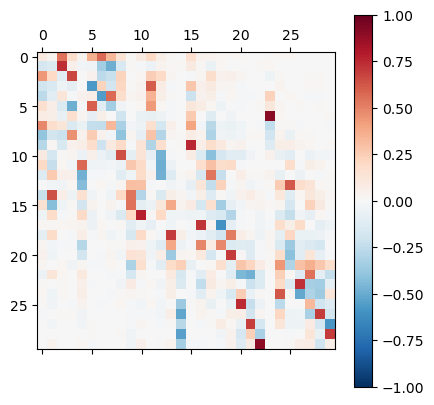

In [303]:
### # Apply PCA on the data considering m=12 (dimensions) and n=100 observations
pca = PCA()
PCs = pca.fit_transform(pivoted_df_cleaned)  
FracVar = pca.explained_variance_ratio_  # calculate fraction of variance explained by each mode
print(FracVar)
eigvecs = pca.components_
#print(eigvecs)
print(eigvecs.shape)
plt.colorbar(plt.matshow(eigvecs, cmap="RdBu_r", vmin=-1, vmax=1))

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_3362/3208488164.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


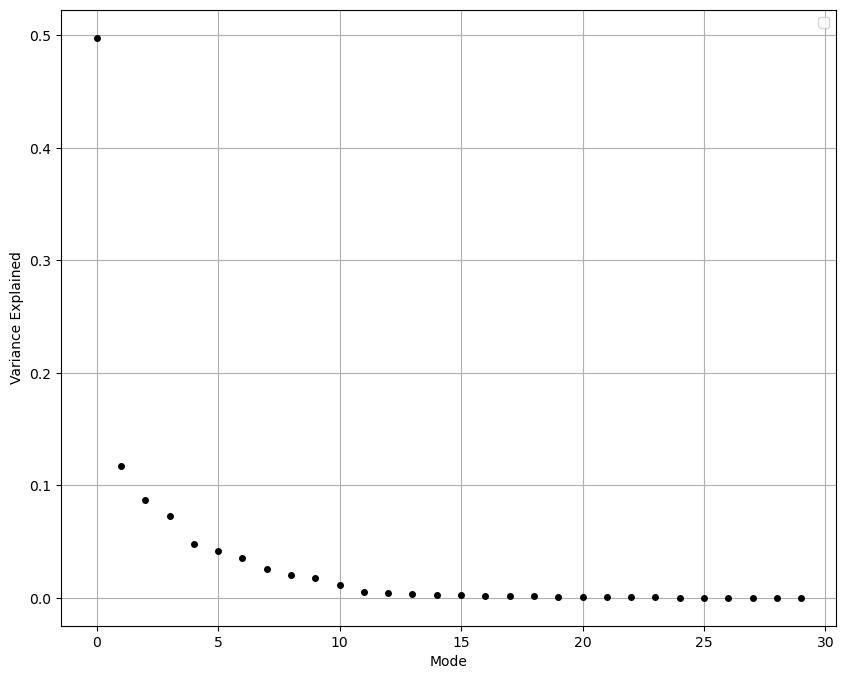

In [304]:
plt.figure(figsize=(10, 8))

plt.plot(FracVar, "ko", ms=4)

#plt.title("Variables over time")
plt.xlabel("Mode")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

In [305]:
# get the latitude and Longitude of these stations
stations_of_interest = pivoted_df_cleaned.columns

# Filter the DataFrame to get only the rows for the stations of interest
data = data.groupby(['Sta_ID'], as_index=False)[['Lat_Dec', 'Lon_Dec']].mean()
stations_lat_lon = data[data['Sta_ID'].isin(stations_of_interest)]

# Display the result
#print(stations_lat_lon[['Sta_ID', 'Lat_Dec', 'Lon_Dec']])
Lat = stations_lat_lon['Lat_Dec']
Lon = stations_lat_lon['Lon_Dec']
Lat

286    34.805085
287    34.389891
301    34.449446
302    34.227205
303    33.817404
309    34.276591
319    34.205186
320    33.879361
321    33.660920
322    33.244791
356    33.655778
357    33.323215
358    33.063713
359    32.657349
391    31.087341
402    33.443763
403    33.108585
404    32.656486
405    32.418054
406    32.083863
407    31.751461
408    31.416839
431    30.513100
442    32.900470
443    32.513181
444    32.182892
445    31.921152
446    31.513284
447    31.179892
448    30.847246
Name: Lat_Dec, dtype: float64

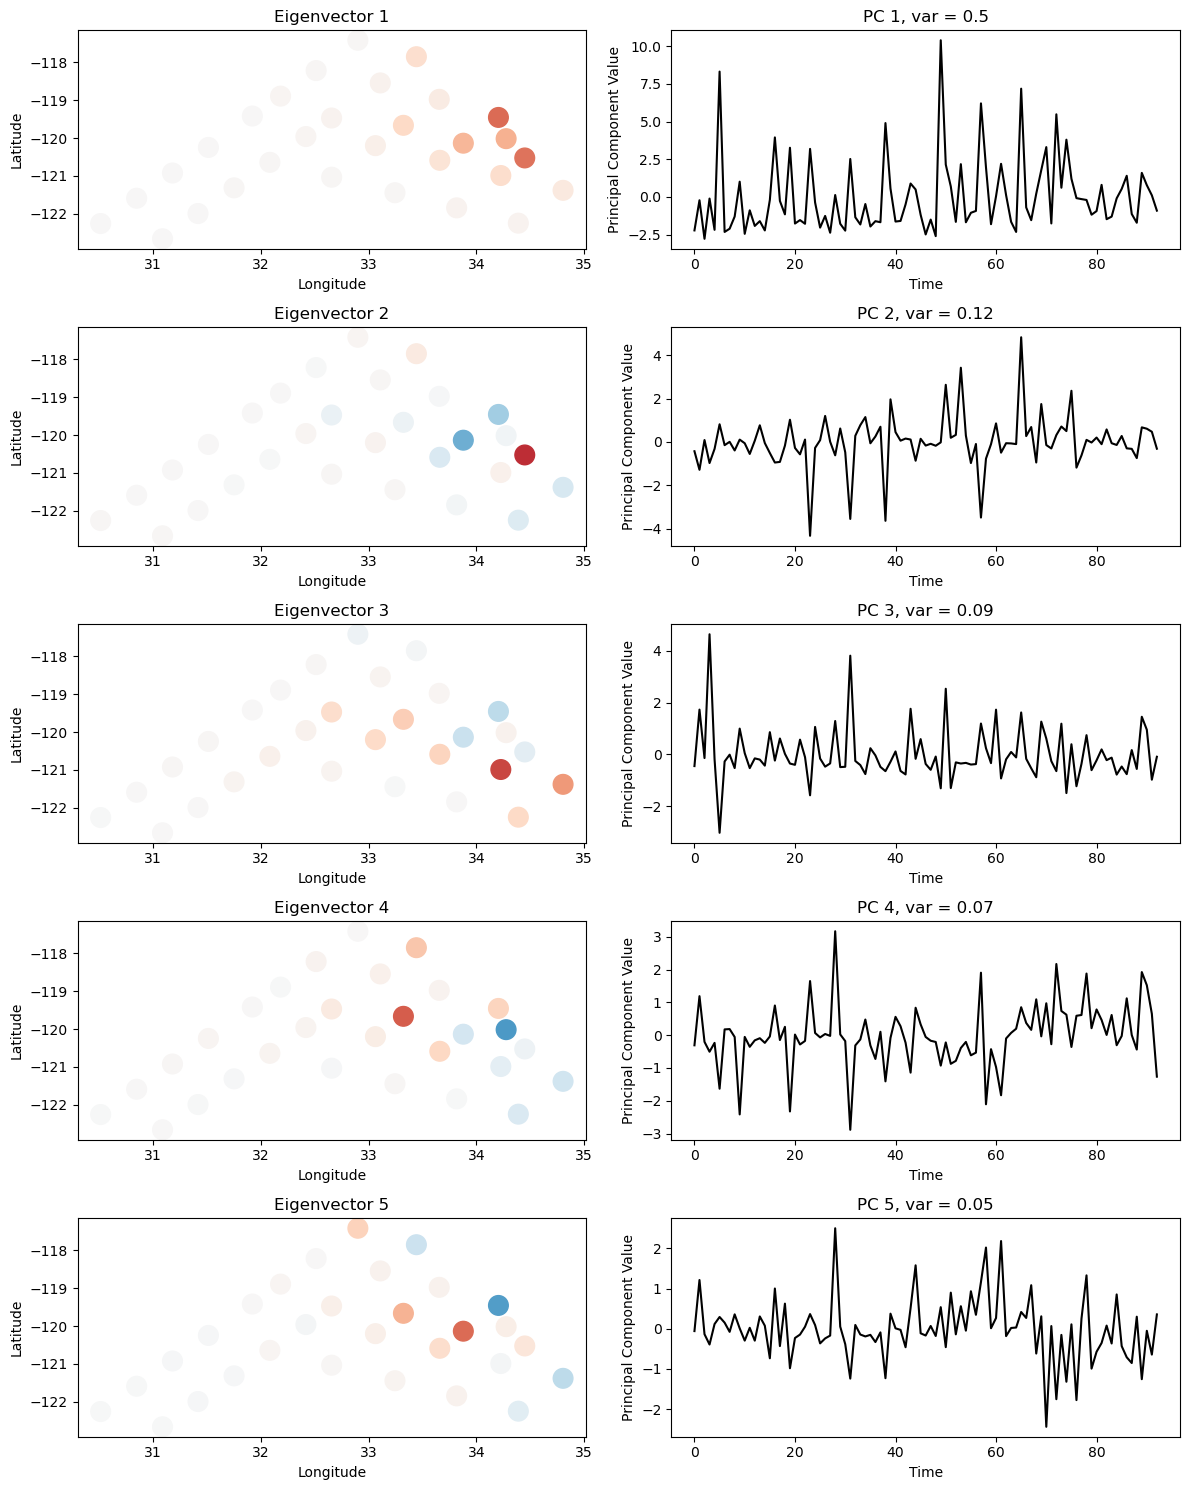

In [307]:
plt.figure(figsize=(12, 15))  # Adjust the size as needed

for i in range(5):
    plt.subplot(5, 2, i * 2 + 1)
    plt.scatter(Lat, Lon, c=eigvecs[i], s=200, cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title(f"Eigenvector {i + 1}")
    #plt.colorbar(label='Eigenvector Value')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.subplot(5, 2, i * 2 + 2)
    plt.plot(PCs[:, i], c="k")
    plt.title(f"PC {i + 1}, var = {round(FracVar[i], 2)}")
    plt.xlabel("Time")
    plt.ylabel("Principal Component Value")

plt.tight_layout()
plt.show()